## Figure 1

The majority of this figure was created in Illustrator, so only one of the panels will be created in this notebook (panel C).

In [2]:
# Change this path for running the notebook locally
eeg_data_path = '/path/to/dataset/' # downloadable from OSF: https://doi.org/10.17605/OSF.IO/FNRD9

In [3]:
perception_color = '#117733'
production_color = '#332288'
subj = 'OP0007'
prod_start = 432.41 # start of production trial
perc_start = 438.13 # start of perception trial
wmin = 430 # window start
wmax = 444 # window stop
picks = ['Fp1','Fp2','AF7','AF8','Cz','PO7','PO8','Oz']

In [4]:
# Load audio
audio_fpath = f'{eeg_data_path}{subj}/{subj}_B1/{subj}_B1_audio.vhdr'
raw_audio = mne.io.read_raw_brainvision(audio_fpath,preload=True,verbose=False)
raw_audio.filter(l_freq=10,h_freq=None)
aud_chs = ['spkr','mic']
audio_resp = raw_audio.get_data(picks=aud_chs)
aud_fs = raw_audio.info['sfreq']
# Load raw EEG
raw_fpath = f'{eeg_data_path}{subj}/{subj}_B1/{subj}_B1_downsampled.vhdr'
raw = mne.io.read_raw_brainvision(raw_fpath,preload=True,verbose=False)
raw.set_eeg_reference(['TP9','TP10'],verbose=False)
raw.notch_filter(60,verbose=False)
raw.filter(l_freq=1,h_freq=15,verbose=False)
# Load preprocessed EEG
cca_fpath = f'{eeg_data_path}{subj}/{subj}_B1/{subj}_B1_cca.vhdr'
cca = mne.io.read_raw_brainvision(cca_fpath,preload=True,verbose=False)
cca.filter(l_freq=1,h_freq=15,verbose=False)
eeg_fs = cca.info['sfreq']

# Extract data in our window of interest, normalize it
tmin,tmax = int(wmin*eeg_fs), int(wmax*eeg_fs)
tmin_a, tmax_a = int(wmin*aud_fs), int(wmax*aud_fs)
eeg_resp = cca.get_data(picks=picks)
eog_resp = raw.get_data(picks=['vEOG'])
emg_resp = raw.get_data(picks=['hEOG'])
perc_norm = audio_resp[0,tmin_a:tmax_a]/(np.abs(audio_resp[0,tmin_a:tmax_a]).max())
prod_norm = audio_resp[1,tmin_a:tmax_a]/np.abs(audio_resp[1,tmin_a:tmax_a]).max()
eog_norm = eog_resp[:,tmin:tmax]/np.abs(eog_resp[:,tmin:tmax]).max()
emg_norm = emg_resp[:,tmin:tmax]/np.abs(emg_resp[:,tmin:tmax]).max()
eeg_norm = eeg_resp[:,tmin:tmax]/np.abs(eeg_resp[:,tmin:tmax]).max()
aud_resp = np.vstack((prod_norm,perc_norm))
eeg_resp = np.vstack((eeg_norm,eog_norm,emg_norm))

/var/folders/72/y7rz3xw121n5pp8przhfnd5c0000gn/T/ipykernel_82416/3133981194.py:3: RuntimeWarning: No coordinate information found for channels ['spkr', 'mic']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw_audio = mne.io.read_raw_brainvision(audio_fpath,preload=True,verbose=False)
/var/folders/72/y7rz3xw121n5pp8przhfnd5c0000gn/T/ipykernel_82416/3133981194.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['spkr', 'mic']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw_audio = mne.io.read_raw_brainvision(audio_fpath,preload=True,verbose=False)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Filter length: 33001 samples (1.320 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
/var/folders/72/y7rz3xw121n5pp8przhfnd5c0000gn/T/ipykernel_82416/3133981194.py:10: RuntimeWarning: No coordinate information found for channels ['spkr', 'mic', 'vEOG', 'hEOG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(raw_fpath,preload=True,verbose=False)
/var/folders/72/y7rz3xw121n5pp8przhfnd5c0000gn/T/ipykernel_82416/3133981194.py:10: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['spkr', 'mic', 'vEOG', 'hEOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(raw_fpath,preload=True,verb

/var/folders/72/y7rz3xw121n5pp8przhfnd5c0000gn/T/ipykernel_82416/127527247.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prod_start_aud = np.int(prod_start*aud_fs)-tmin_a
/var/folders/72/y7rz3xw121n5pp8przhfnd5c0000gn/T/ipykernel_82416/127527247.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

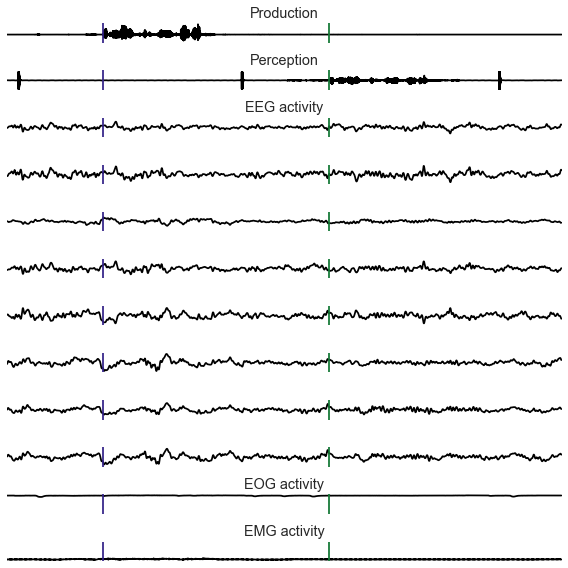

In [5]:
# Plot
prod_start_eeg = int(prod_start*eeg_fs)-tmin
perc_start_eeg = int(perc_start*eeg_fs)-tmin

prod_start_aud = np.int(prod_start*aud_fs)-tmin_a
perc_start_aud = np.int(perc_start*aud_fs)-tmin_a

labels = ['Production','Perception']+picks+['EOG activity','EMG activity']
nrows = len(labels)
fig, ax = plt.subplots(nrows=nrows,ncols=1,sharex=False,sharey=True,figsize=(8,8))
for i,l in enumerate(labels):
    plt.subplot(nrows,1,i+1)
    if l == 'Production':
        plt.plot(aud_resp[i,:].T, color='k')
        plt.gca().set_xlim([0,aud_resp.shape[1]])
        plt.axvline(prod_start_aud,color=production_color,label='Production start')
        plt.axvline(perc_start_aud,color=perception_color,label='Perception start')
    elif l == 'Perception':
        plt.plot(aud_resp[i,:].T, color='k')
        plt.gca().set_xlim([0,aud_resp.shape[1]])
        plt.axvline(prod_start_aud,color=production_color,label='Production start')
        plt.axvline(perc_start_aud,color=perception_color,label='Perception start')
    else:
        plt.plot(eeg_resp[i-2,:].T,color='k')
        plt.gca().set_xlim([0,eeg_resp.shape[1]])
        plt.axvline(prod_start_eeg,color=production_color,label='Production start')
        plt.axvline(perc_start_eeg,color=perception_color,label='Perception start')
    plt.axis('off')
    if l in ['Perception','Production','EOG activity','EMG activity']:
        plt.title(l,fontsize="x-large")
    if i == 2:
        plt.title("EEG activity",fontsize="x-large")
plt.tight_layout()

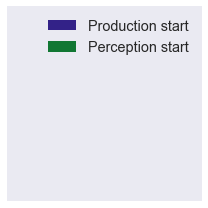

In [6]:
# legend
fig = plt.figure(figsize=(3,3))
plt.bar(0,0,color=production_color);
plt.bar(0,0,color=perception_color);
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.legend(['Production start','Perception start'],fontsize='x-large')
plt.grid(False)
plt.tight_layout()